In [ ]:
!pip install gradio llama-cpp-python huggingface_hub

In [ ]:
import gradio as gr
from llama_cpp import Llama
from huggingface_hub import hf_hub_download

# Download and load the model
model_path = hf_hub_download(
    repo_id="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
    filename="mistral-7b-instruct-v0.1.Q4_K_M.gguf"
)

# Load Mistral-7B with optimized settings
llm = Llama(model_path=model_path, n_ctx=1024)  # Increased context for longer output

# Resume & Cover Letter Generation
def generate_resume(name, job_title, experience, skills, education):
    prompt = f"""
    Generate a professional ATS-friendly resume for {name} applying for a {job_title} role.

    Experience:
    {experience}

    Skills:
    {skills}

    Education:
    {education}

    Format it properly with sections for Summary, Experience, Skills, and Education.
    """

    response = llm(
        prompt=prompt,
        max_tokens=600,  # Increased tokens for more content
        temperature=0.7,
        stream=True
    )

    final_text = ""
    for chunk in response:
        final_text += chunk["choices"][0]["text"]

    resume_text = final_text.strip()

    # Save the resume to a file
    with open("resume.txt", "w") as f:
        f.write(resume_text)

    return resume_text, "resume.txt"  # Return resume text + file path for download

def generate_cover_letter(name, job_title, company, experience, skills):
    prompt = f"""
    Write a professional cover letter for {name} applying for a {job_title} role at {company}.

    Experience:
    {experience}

    Skills:
    {skills}

    Ensure it follows a proper structure: Introduction, Body, and Closing.
    """

    response = llm(
        prompt=prompt,
        max_tokens=600,
        temperature=0.7,
        stream=True
    )

    final_text = ""
    for chunk in response:
        final_text += chunk["choices"][0]["text"]

    return final_text.strip()

# Gradio UI
with gr.Blocks(theme=gr.themes.Soft(), css="""
    input[type="text"] {
        background-color: #FFB8E0 !important;
        border: 1px solid #4A90E2 !important;
        color: #4A90E2 !important;
    }
    input[type="text"]::placeholder {
        color: rgba(203, 227, 75, 0.5) !important;
    }
""") as demo:
    gr.HTML("<h1 style='text-align:center; color:#4A90E2;'>Generate Resume & Cover Letter</h1>")

    with gr.Row():
        with gr.Column():
            name = gr.Textbox(label="Your Name", placeholder="Enter your full name")
            job_title = gr.Textbox(label="Job Title", placeholder="e.g., Software Engineer")
            company = gr.Textbox(label="Company (for Cover Letter)", placeholder="Enter company name")

        with gr.Column():
            experience = gr.Textbox(label="Work Experience", placeholder="Describe your work experience")
            skills = gr.Textbox(label="Key Skills", placeholder="List your key skills separated by commas")
            education = gr.Textbox(label="Education Details", placeholder="Enter your highest qualification")

    with gr.Row():
        generate_resume_btn = gr.Button("Generate Resume", variant="primary")
        generate_cover_btn = gr.Button("Generate Cover Letter", variant="secondary")

    with gr.Row():
        resume_output = gr.Textbox(label="Generated Resume", lines=15, interactive=False, show_copy_button=True)
        resume_download = gr.File(label="Download Resume", visible=False)

        cover_output = gr.Textbox(label="Generated Cover Letter", lines=15, interactive=False, show_copy_button=True)

    # Resume Button: Generates Resume + Shows Download Option
    generate_resume_btn.click(generate_resume,
                              inputs=[name, job_title, experience, skills, education],
                              outputs=[resume_output, resume_download])

    # Cover Letter Button
    generate_cover_btn.click(generate_cover_letter,
                             inputs=[name, job_title, company, experience, skills],
                             outputs=cover_output)

demo.launch()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
llama_model_loader: loaded meta data with 20 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.1-GGUF/snapshots/731a9fc8f06f5f5e2db8a0cf9d256197eb6e05d1/mistral-7b-instruct-v0.1.Q4_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: -

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d0d4f92350934395c5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.1 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


# 🎯 **ATS Score: 73.45%**



## 💡 **Suggestions for Improvement:**

- 🔍 **Include more relevant technical skills to improve your resume.**

- 💡 **Clearly list your technical skills and industry-specific expertise.**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


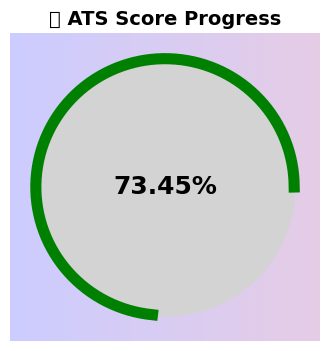

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


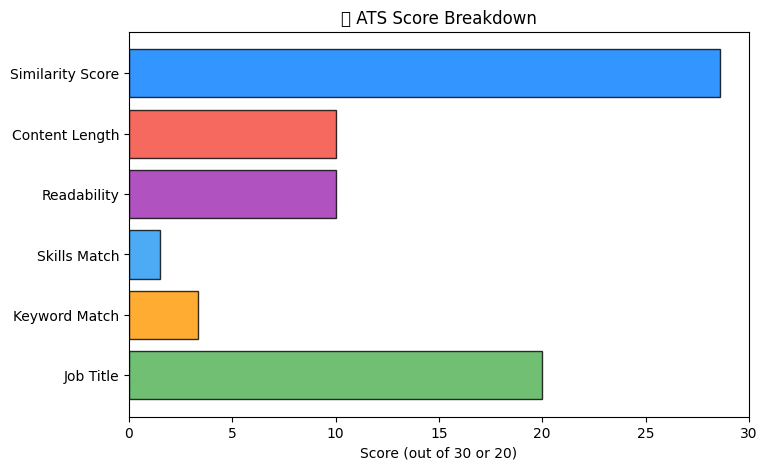

In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.patches import Circle
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display, Markdown

# Load NLP models
model = SentenceTransformer("all-MiniLM-L6-v2")
nlp = spacy.load("en_core_web_sm")

# Read the resume file
resume_path = "resume.txt"
if not os.path.exists(resume_path):
    raise FileNotFoundError("⚠️ Error: resume.txt not found.")

with open(resume_path, "r", encoding="utf-8") as file:
    resume_text = file.read()

# Extract job description dynamically
summary_match = re.search(r"Summary:\s*(.*?)(?:Experience:|Skills:|Education:|$)", resume_text, re.DOTALL)
job_description = summary_match.group(1).strip() if summary_match else ". ".join(re.split(r'\.\s+', resume_text)[:3])

# Compute similarity score
resume_embedding = model.encode(resume_text, convert_to_tensor=True)
job_embedding = model.encode(job_description, convert_to_tensor=True)
similarity_score = util.pytorch_cos_sim(resume_embedding, job_embedding).item() * 100

# Extract job title
common_titles = {"developer", "engineer", "manager", "designer", "analyst", "consultant", "specialist"}
doc = nlp(resume_text)
job_title = next((ent.text for ent in doc.ents if ent.label_ == "ORG" or any(word.lower() in common_titles for word in ent.text.split())), "")

# Extract relevant terms using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=20)
tf_idf_matrix = vectorizer.fit_transform([resume_text])
extracted_keywords = vectorizer.get_feature_names_out()

# Technical Skills Matching
tech_skills = {"python", "java", "javascript", "sql", "aws", "docker", "react", "machine learning", "data analysis"}
skills_found = set(extracted_keywords) & tech_skills

# Scoring calculations
job_title_score = 20 if job_title else 5
keyword_match_score = min((len(skills_found) / len(tech_skills)) * 30, 30)
skills_match_score = min((len(skills_found) / len(extracted_keywords)) * 30, 30)
readability_score = 10 if "-" in resume_text or "\n" in resume_text else 4
word_count_score = 10 if len(resume_text.split()) > 250 else 5
similarity_weighted_score = min(similarity_score * 0.3, 30)

# Final ATS Score Calculation
ats_score = round(job_title_score + keyword_match_score + skills_match_score + readability_score + word_count_score + similarity_weighted_score, 2)

# Suggestions for improvement
suggestions = []
if not job_title:
    suggestions.append("📝 **Ensure your resume includes a clear job title.**")
if keyword_match_score < 20:
    suggestions.append("🔍 **Include more relevant technical skills to improve your resume.**")
if skills_match_score < 20:
    suggestions.append("💡 **Clearly list your technical skills and industry-specific expertise.**")
if readability_score < 10:
    suggestions.append("📌 **Use bullet points to enhance readability.**")
if word_count_score < 10:
    suggestions.append("📜 **Add more detailed projects or experiences to strengthen your resume.**")

display(Markdown(f"""
# 🎯 **ATS Score: {ats_score}%**
{"✅ Your resume is well-optimized!" if not suggestions else ""}
"""))
if suggestions:
    display(Markdown("## 💡 **Suggestions for Improvement:**"))
    for suggestion in suggestions:
        display(Markdown(f"- {suggestion}"))

    print("\n")

# Circular Progress Indicator
def plot_progress_circle(score):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.axis("off")
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    cmap = LinearSegmentedColormap.from_list("blue_purple", ["#0000FF", "#800080"])
    ax.imshow(gradient, aspect="auto", cmap=cmap, extent=[-1.2, 1.2, -1.2, 1.2], alpha=0.2)
    ax.add_patch(Circle((0, 0), 1, color="lightgray", lw=2, fill=True))
    theta = np.linspace(0, (score / 100) * 2 * np.pi, 100)
    ax.plot(np.cos(theta), np.sin(theta), lw=8, color="green")
    ax.text(0, 0, f"{score}%", fontsize=18, fontweight="bold", ha="center", va="center", color="black")
    ax.set_title("🎯 ATS Score Progress", fontsize=14, fontweight="bold")
    plt.show()

plot_progress_circle(ats_score)

print("\n")

# Bar Chart Breakdown
labels = ["Job Title", "Keyword Match", "Skills Match", "Readability", "Content Length", "Similarity Score"]
scores = [job_title_score, keyword_match_score, skills_match_score, readability_score, word_count_score, similarity_weighted_score]
colors = ["#4CAF50", "#FF9800", "#2196F3", "#9C27B0", "#F44336", "#007BFF"]
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(labels, scores, color=colors, edgecolor="black", alpha=0.8)
ax.set_xlabel("Score (out of 30 or 20)")
ax.set_title("📊 ATS Score Breakdown")
ax.set_xlim(0, 30)
plt.show()


In [ ]:
!pip install nltk rouge rouge-score torch


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.7 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=4fde5a4b7d58d7714076a792b3cf0a23cecfb5dcfd725d788c2089d7d447ec84
  

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge

# File paths (Replace these with your actual file paths)
reference_resume_path = "/content/drive/MyDrive/resume for comparison.txt"  # Your existing resume
generated_resume_path = "/content/resume.txt"  # Your newly generated resume

# Read the reference resume
with open(reference_resume_path, "r", encoding="utf-8") as ref_file:
    reference_text = ref_file.read()

# Read the generated resume
with open(generated_resume_path, "r", encoding="utf-8") as gen_file:
    generated_text = gen_file.read()

# Tokenizing sentences for BLEU Score Calculation
reference_tokens = [reference_text.split()]
generated_tokens = generated_text.split()

# Compute BLEU Score with smoothing (to handle short sentences)
smoothie = SmoothingFunction().method1
bleu_score = sentence_bleu(reference_tokens, generated_tokens, smoothing_function=smoothie)

# Compute ROUGE Score
rouge = Rouge()
rouge_scores = rouge.get_scores(generated_text, reference_text, avg=True)

rouge_1_score = rouge_scores["rouge-1"]["f"]
rouge_2_score = rouge_scores["rouge-2"]["f"]
rouge_l_score = rouge_scores["rouge-l"]["f"]

# Print Results
print(f"BLEU Score: {bleu_score:.4f}")
print(f"ROUGE-1 Score: {rouge_1_score:.4f}")
print(f"ROUGE-2 Score: {rouge_2_score:.4f}")
print(f"ROUGE-L Score: {rouge_l_score:.4f}")


BLEU Score: 0.1514
ROUGE-1 Score: 0.4381
ROUGE-2 Score: 0.2669
ROUGE-L Score: 0.4267


In [ ]:
import time
import psutil  # For CPU monitoring
import pynvml  # For NVIDIA GPU monitoring
import math

# Function to measure throughput and latency
def measure_performance(generate_resume_function):
    print("Starting performance measurement...")

    start_time = time.time()

    generate_resume()  # Call your resume generation function

    end_time = time.time()

    total_time = end_time - start_time  # Time taken for one resume

    throughput = 1 / total_time  # Since only one resume is generated
    avg_latency = total_time  # Latency is just the time taken for that one generation

    print(f"Total Time Taken: {total_time:.4f} sec")

    return throughput, avg_latency

# Function to check GPU usage
def get_gpu_usage():
    try:
        pynvml.nvmlInit()
        device_count = pynvml.nvmlDeviceGetCount()
        for i in range(device_count):
            handle = pynvml.nvmlDeviceGetHandleByIndex(i)
            usage = pynvml.nvmlDeviceGetUtilizationRates(handle)
            print(f"GPU {i}: {usage.gpu}% usage, {usage.memory}% memory usage")
        pynvml.nvmlShutdown()
    except:
        print("No GPU detected or NVML not installed.")

# Function to check CPU usage
def get_cpu_usage():
    return psutil.cpu_percent(interval=1)

# Dummy Resume Generation Function (Replace with your actual function)
def generate_resume():
    print("Generating resume...")
    time.sleep(0.5)  # Simulating resume generation time

# Run performance tests
throughput, avg_latency = measure_performance(generate_resume)

# Display results
print(f"Throughput: {math.floor(1 / avg_latency)} resumes/sec")
print(f"Average Latency: {avg_latency:.4f} sec per resume")
print(f"CPU Usage: {get_cpu_usage()}%")
get_gpu_usage()


Starting performance measurement...
Generating resume...
Total Time Taken: 0.5002 sec
Throughput: 1 resumes/sec
Average Latency: 0.5002 sec per resume
CPU Usage: 2.5%
GPU 0: 0% usage, 0% memory usage
